# Subamostragem e sobreamostragem

Usamos essa estrategia quando, em um algoritmo de classificação, temos muitos mais dados de uma classe em comparação com outra

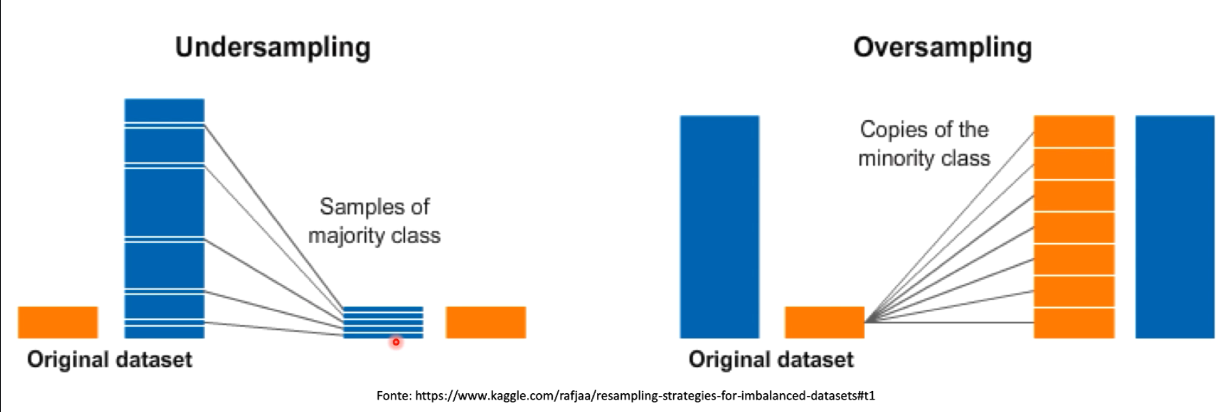

Essa copia é chamada de copia sintetica, feita a partir de um algoritmo, nao sendo literalmente uma copia

**SUBAMOSTRAGEM - TOMEK LINKS**


excluimos os dados de duas classes diferentes que estão muito proximos de outras classe, para ficar mais divisivel


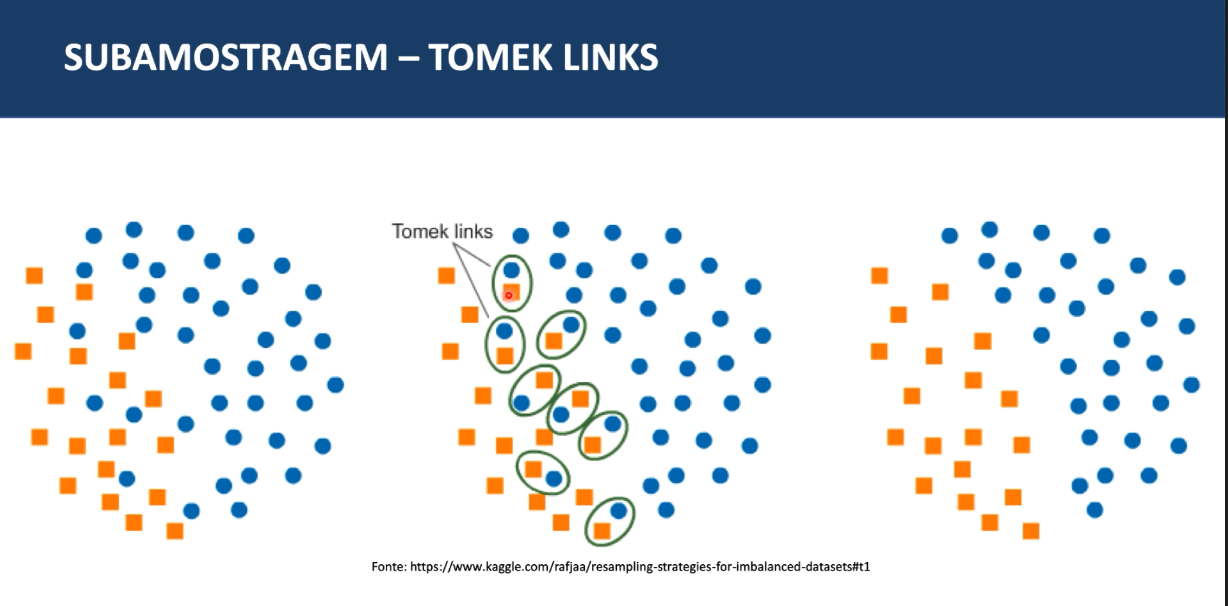

**SOBREAMOSTRAGEM - SMOTE**

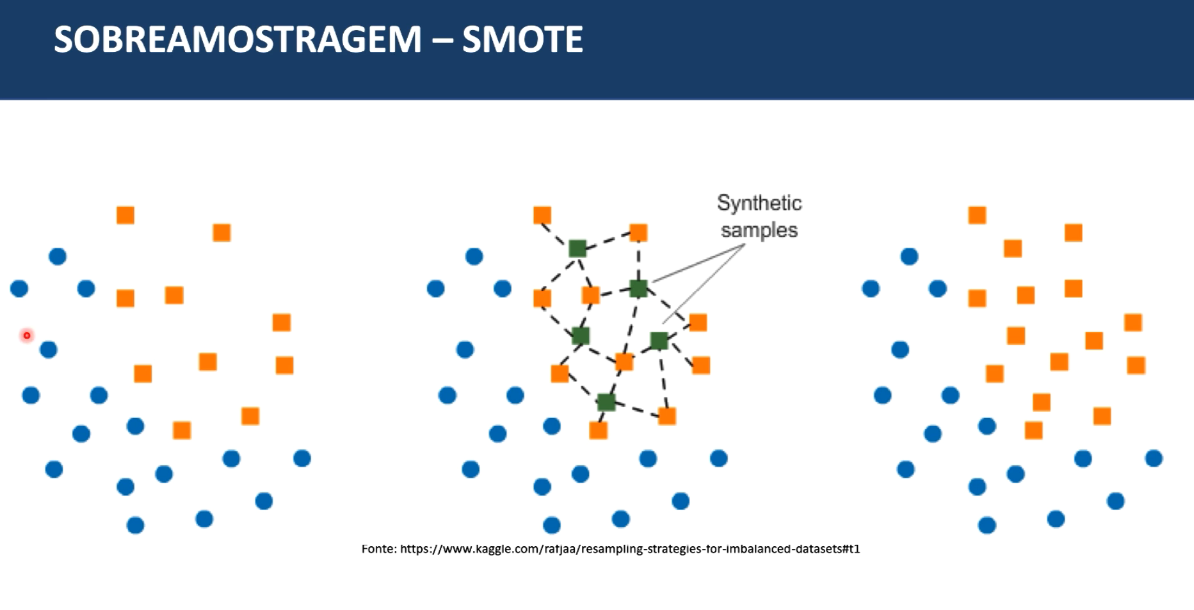

# Implementação


### **Pre-processamento**

In [105]:
import pandas as pd
base_census = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
import numpy as np
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

a classe <=50K tem muito mais registos


<Axes: xlabel='income', ylabel='count'>

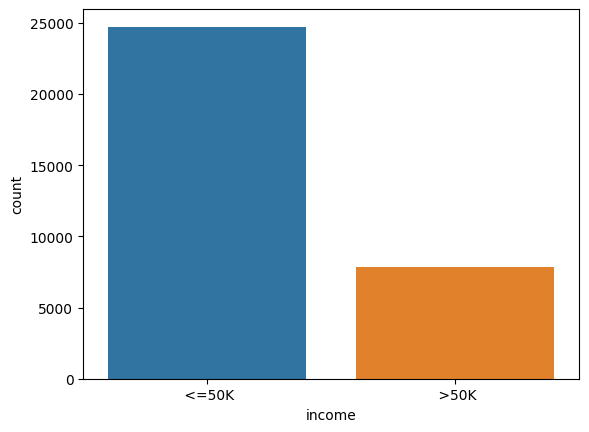

In [107]:
import seaborn as sns
sns.countplot(x = base_census['income'])

In [108]:
# PRecisamos fazer alguns pre processamentos
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [109]:
X_census.shape

(32561, 14)

In [110]:
y_census = base_census.iloc[:,14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

Temos que converter os atributos categoricos para podermos aplicar os algoritmos de tratamento de dados desbalanceados

In [111]:
# Criamops um labelEncoder para cada um dos atributos
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [112]:
# aplicamos um labelEncoder para cada um dos atributos
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [113]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

### Subamostragem com Tomek Links

Vamos apagar alguns dados que tenham muita proximidade com outra classe

In [114]:
from imblearn.under_sampling import TomekLinks

In [115]:
tl = TomekLinks(sampling_strategy='all') # Balanceamento considerando a classe com mais registros
X_under, y_under = tl.fit_resample(X_census, y_census)

In [116]:
X_under.shape, y_under.shape

((27759, 14), (27759,))

In [117]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [118]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  5440]))

Agora temos uma diferença menor entre as classes, uma vez que apagamos alguns dados da classe com mais registros

In [119]:
# Aplicando o OneHotEncoder
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
#X_census = onehotencorder.fit_transform(X_under).toarray()
#X_census

In [120]:
#X_census.shape

In [121]:
# BAse de treino e teste usando a base under
from sklearn.model_selection import train_test_split
X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((23595, 14), (4164, 14))

In [122]:
# Aplicando o random forest -> modoulos passados : acc = 84.7%
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [123]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)

0.8902497598463016

Uma grande melhora é vista quando aplicamos o algoritmo de tomei links com o atributo "ALL"

In [124]:
print(classification_report(y_census_teste_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.91      0.96      0.93      3344
        >50K       0.78      0.62      0.69       820

    accuracy                           0.89      4164
   macro avg       0.85      0.79      0.81      4164
weighted avg       0.88      0.89      0.89      4164



## Sobreamostragem com SMOTE

Basicamente vamos sintetizar novos registros a partir dos ja existentes

In [125]:
from imblearn.over_sampling import SMOTE

In [126]:
X_census.shape, y_census.shape

((32561, 14), (32561,))

In [127]:
smote = SMOTE(sampling_strategy='minority') # Vai fazer o balanceamento apenas para a classe com menos registros
X_over, y_over = smote.fit_resample(X_census, y_census)

In [128]:
X_over.shape, y_over.shape

((49440, 14), (49440,))

In [129]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [130]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

Agora temos exatamente a mesma quantidade de registros

In [132]:
# Dividindo a base de dados
from sklearn.model_selection import train_test_split
X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)

In [133]:
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 14), (7416, 14))

In [135]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [136]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over, previsoes)

0.9104638619201726

In [137]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

